<a href="https://colab.research.google.com/github/YUTEEKAY/MySubmission/blob/main/3mttProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np

# Load dataset
data_path = "./covid_19_clean_complete.csv"  # Adjust path if needed
df = pd.read_csv(data_path)

# Step 1: Inspect and clean the data
print("Initial Dataset Overview:\n", df.head())
print("\nDataset Info:\n")
df.info()

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
missing_summary = df.isnull().sum()
print("\nMissing Values Summary:\n", missing_summary)

# Filling missing values (example: forward fill for time-series consistency)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Step2: Standardize date formats
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Step 3: Feature Engineering
# Daily Growth Rate
# Group by Country/Region and compute daily differences for cases
df['Daily_Cases'] = df.groupby(['Country/Region'])['Confirmed'].diff().fillna(0)
df['Daily_Growth_Rate'] = df['Daily_Cases'] / (df['Confirmed'] - df['Daily_Cases']).replace(0, np.nan)

# Mortality Rate
df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed']).replace([np.inf, -np.inf], 0).fillna(0) * 100

# Cases per Population (requires population data)
population_data = {
    "US": 331002651,
    "China": 1439323776,
    "Italy": 60461826,
    "Spain": 46754778,
    "Germany": 83783942,
    # Add more countries as needed
}
df['Population'] = df['Country/Region'].map(population_data)
df['Cases_per_Population'] = (df['Confirmed'] / df['Population']).replace([np.inf, -np.inf], 0).fillna(0)

# Step 4: Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Daily_Cases', 'Cases_per_Population']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save the cleaned and transformed dataset for further steps
df.to_csv("./cleaned_covid_data.csv", index=False)
print("\nData preprocessing completed. Cleaned data saved as 'cleaned_covid_data.csv'.")

# Quick summary of the cleaned data
print("\nCleaned Dataset Overview:\n", df.head())


Initial Dataset Overview:
   Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
--- 

<ipython-input-3-c2df603df518>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-3-c2df603df518>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)



Data preprocessing completed. Cleaned data saved as 'cleaned_covid_data.csv'.

Cleaned Dataset Overview:
                  Province/State Country/Region       Lat       Long  \
0  Australian Capital Territory    Afghanistan  33.93911  67.709953   
1  Australian Capital Territory        Albania  41.15330  20.168300   
2  Australian Capital Territory        Algeria  28.03390   1.659600   
3  Australian Capital Territory        Andorra  42.50630   1.521800   
4  Australian Capital Territory         Angola -11.20270  17.873900   

        Date  Confirmed  Deaths  Recovered  Active             WHO Region  \
0 2020-01-22        0.0     0.0        0.0       0  Eastern Mediterranean   
1 2020-01-22        0.0     0.0        0.0       0                 Europe   
2 2020-01-22        0.0     0.0        0.0       0                 Africa   
3 2020-01-22        0.0     0.0        0.0       0                 Europe   
4 2020-01-22        0.0     0.0        0.0       0                 Africa   

   


Dataset Overview:
                  Province/State Country/Region       Lat       Long  \
0  Australian Capital Territory    Afghanistan  33.93911  67.709953   
1  Australian Capital Territory        Albania  41.15330  20.168300   
2  Australian Capital Territory        Algeria  28.03390   1.659600   
3  Australian Capital Territory        Andorra  42.50630   1.521800   
4  Australian Capital Territory         Angola -11.20270  17.873900   

        Date  Confirmed  Deaths  Recovered  Active             WHO Region  \
0 2020-01-22        0.0     0.0        0.0       0  Eastern Mediterranean   
1 2020-01-22        0.0     0.0        0.0       0                 Europe   
2 2020-01-22        0.0     0.0        0.0       0                 Africa   
3 2020-01-22        0.0     0.0        0.0       0                 Europe   
4 2020-01-22        0.0     0.0        0.0       0                 Africa   

   Daily_Cases  Daily_Growth_Rate  Mortality_Rate  Population  \
0     0.500007           

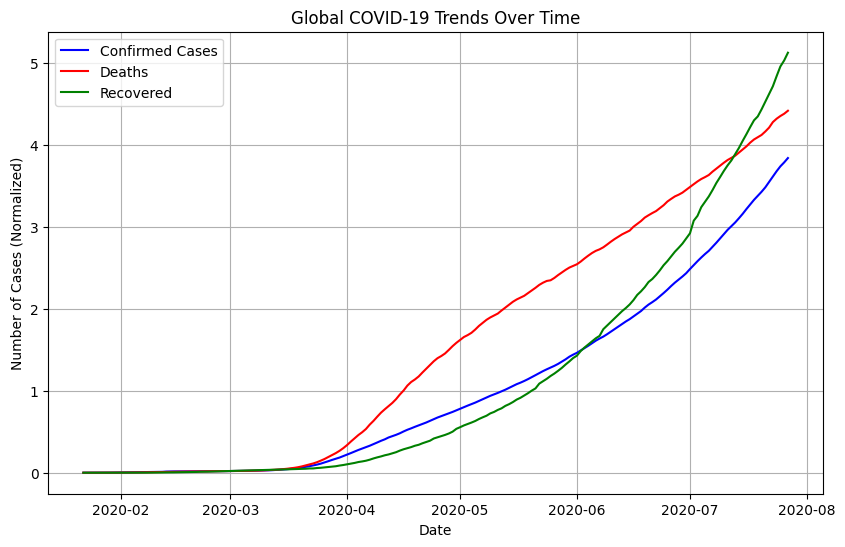


Top 5 Countries with Highest Confirmed Cases:
 Country/Region
US              1.000000
Brazil          0.569284
India           0.344985
Russia          0.190357
South Africa    0.105478
Name: Confirmed, dtype: float64


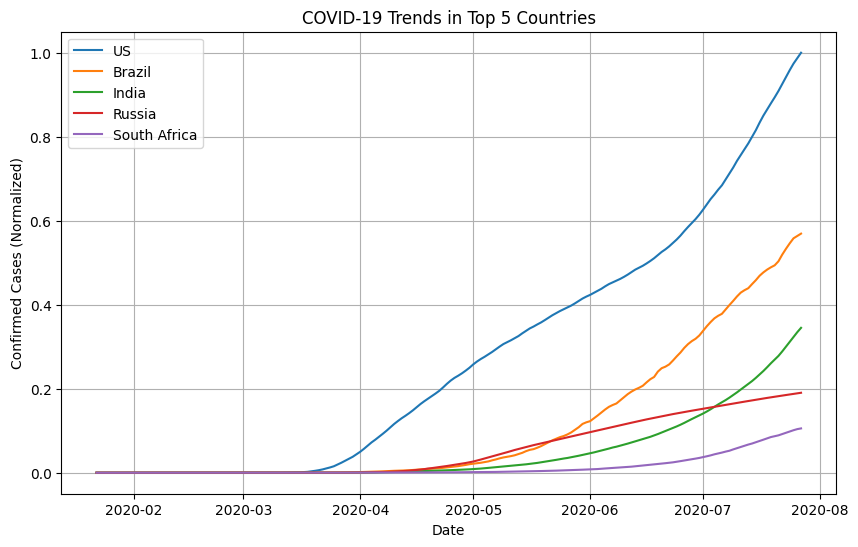

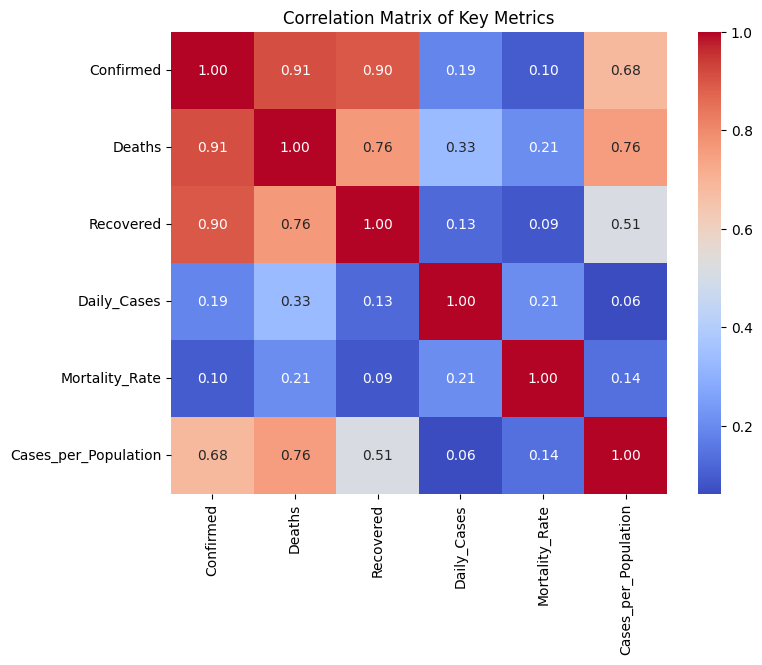


Top 5 Countries with Highest Mortality Rates:
 Country/Region
Yemen          11.184522
Sudan          10.357696
Philippines    10.345289
Italy          10.119833
Belgium         9.681450
Name: Mortality_Rate, dtype: float64


<ipython-input-4-311ba8cfd08a>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mortality_countries.index, y=top_mortality_countries.values, palette='Reds')


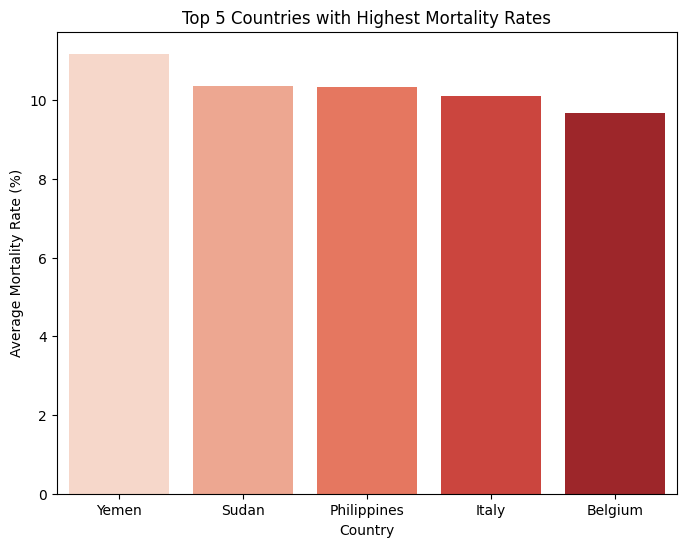

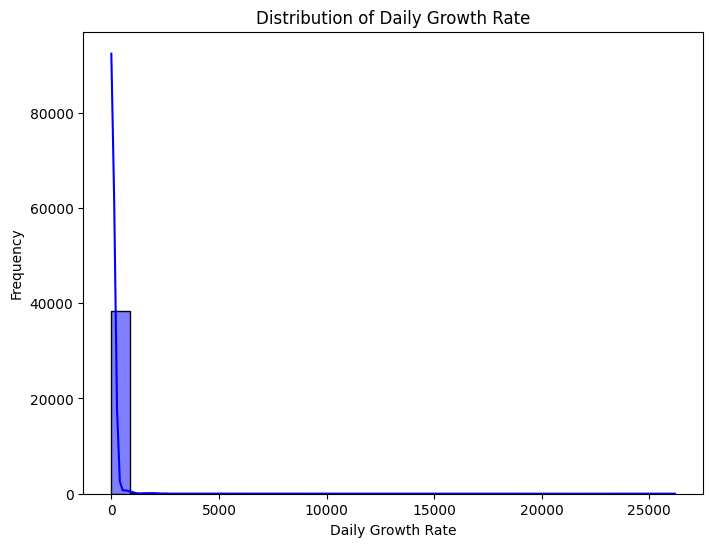

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_path = "./cleaned_covid_data.csv"  # Adjust path if needed
df = pd.read_csv(data_path)

# Convert 'Date' back to datetime for time-series analysis
df['Date'] = pd.to_datetime(df['Date'])

# Quick Summary
print("\nDataset Overview:\n", df.head())
print("\nStatistical Summary:\n", df.describe())

# Step 3.1: Time-Series Trends
# Case Trends Over Time (Global)
global_cases = df.groupby('Date').sum()

plt.figure(figsize=(10, 6))
plt.plot(global_cases.index, global_cases['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(global_cases.index, global_cases['Deaths'], label='Deaths', color='red')
plt.plot(global_cases.index, global_cases['Recovered'], label='Recovered', color='green')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# Step 3.2: Country-Level Analysis
# Top 5 countries with the highest confirmed cases
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5)
print("\nTop 5 Countries with Highest Confirmed Cases:\n", top_countries)

# Plotting trends for the top 5 countries
plt.figure(figsize=(10, 6))
for country in top_countries.index:
    country_data = df[df['Country/Region'] == country].groupby('Date').sum()
    plt.plot(country_data.index, country_data['Confirmed'], label=country)
plt.title('COVID-19 Trends in Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# Step 3.3: Correlation Analysis
# Correlation heatmap of numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Daily_Cases', 'Mortality_Rate', 'Cases_per_Population']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Metrics')
plt.show()

# Step 3.4: Mortality Rate by Country
# Top 5 countries with the highest mortality rates
top_mortality_countries = df.groupby('Country/Region')['Mortality_Rate'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Countries with Highest Mortality Rates:\n", top_mortality_countries)

# Bar plot for countries with highest mortality rates
plt.figure(figsize=(8, 6))
sns.barplot(x=top_mortality_countries.index, y=top_mortality_countries.values, palette='Reds')
plt.title('Top 5 Countries with Highest Mortality Rates')
plt.xlabel('Country')
plt.ylabel('Average Mortality Rate (%)')
plt.show()

# Step 3.5: Daily Growth Rate Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Growth_Rate'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Daily Growth Rate')
plt.xlabel('Daily Growth Rate')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

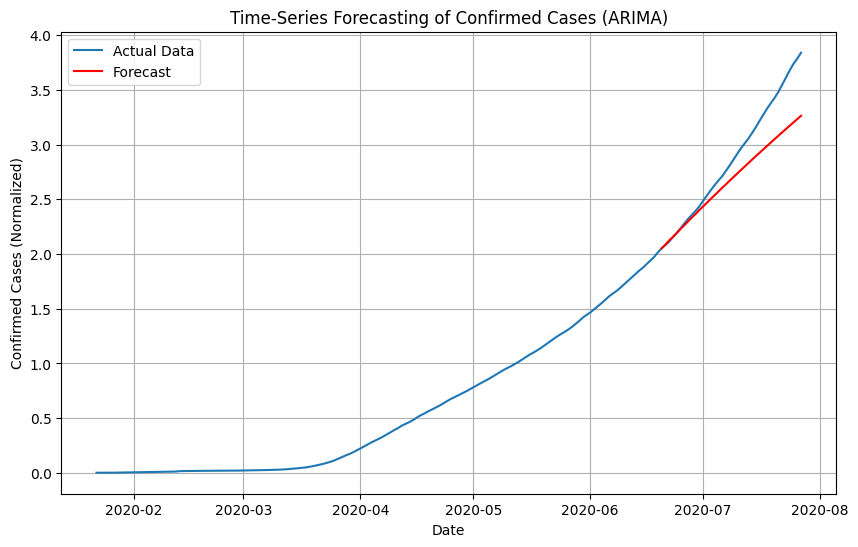


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6651
           1       0.99      1.00      0.99      3163

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814

Accuracy Score: 0.9967393519461993


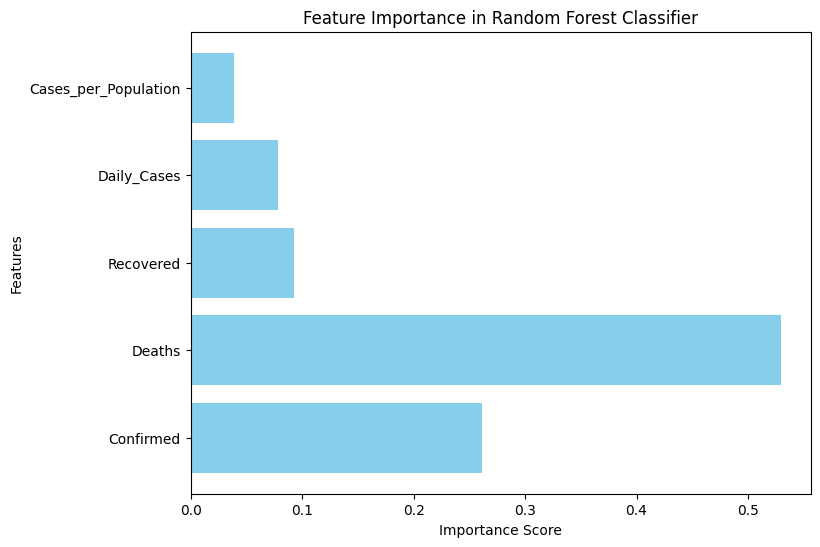

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset
data_path = "./cleaned_covid_data.csv"  # Adjust path if needed
df = pd.read_csv(data_path)

# Convert 'Date' back to datetime for time-series analysis
df['Date'] = pd.to_datetime(df['Date'])

# Ensure relevant columns are numeric
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Daily_Cases', 'Mortality_Rate', 'Cases_per_Population']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 4.1: Time-Series Forecasting with ARIMA
# Focus on global confirmed cases for simplicity
global_cases = df.groupby('Date')['Confirmed'].sum()

# Train-Test Split for Time-Series
train_size = int(len(global_cases) * 0.8)
train, test = global_cases[:train_size], global_cases[train_size:]

# Build ARIMA Model
arima_model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) parameters can be tuned
arima_result = arima_model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test))
plt.figure(figsize=(10, 6))
plt.plot(global_cases.index, global_cases, label='Actual Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Time-Series Forecasting of Confirmed Cases (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Normalized)')
plt.legend()
plt.grid(True)
plt.savefig('forecast.png')
plt.show()

# Step 4.2: Classification Model
# Binary Classification: Predict if Mortality Rate > Threshold
mortality_threshold = 2.0  # Adjust threshold as needed
df['High_Mortality'] = (df['Mortality_Rate'] > mortality_threshold).astype(int)

# Feature and Target Selection
X = df[['Confirmed', 'Deaths', 'Recovered', 'Daily_Cases', 'Cases_per_Population']]
y = df['High_Mortality']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


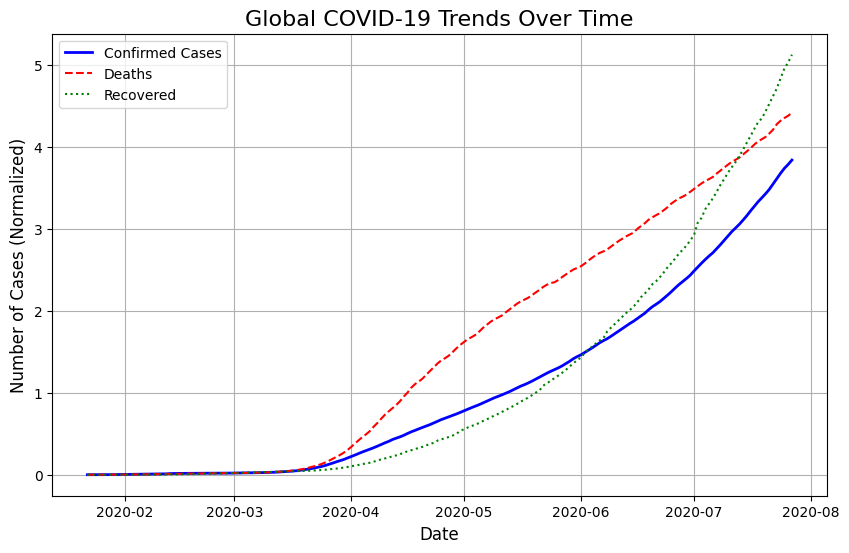

<ipython-input-7-c21c97e8297a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


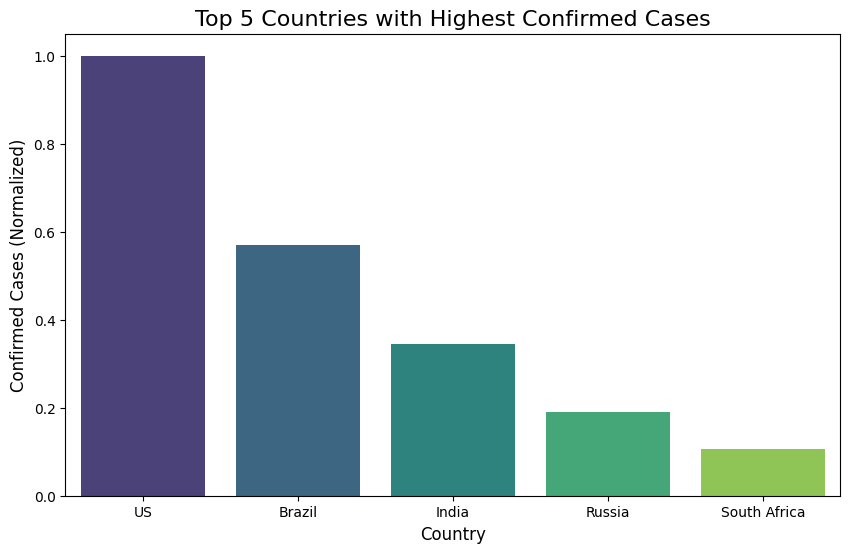

<ipython-input-7-c21c97e8297a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mortality_countries.index, y=top_mortality_countries.values, palette='Reds')


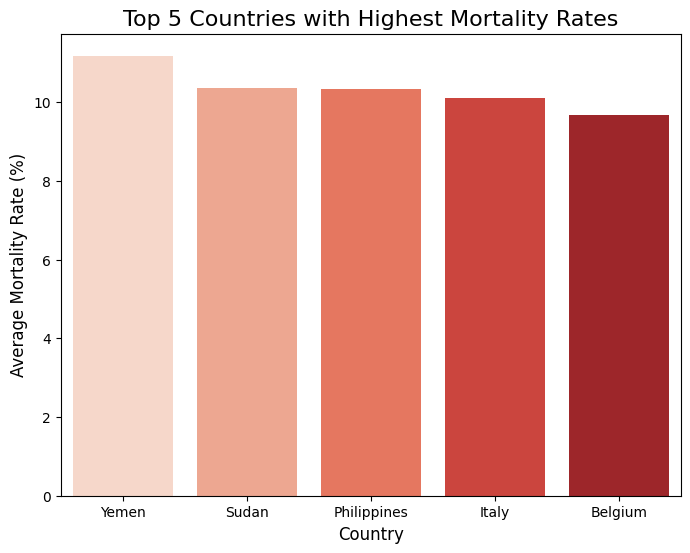

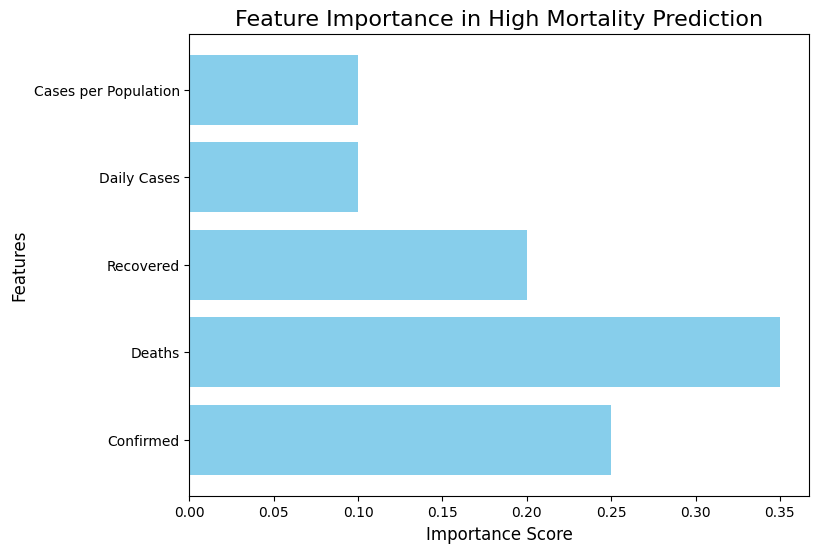

Visualizations saved as images for inclusion in the final report.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_path = "./cleaned_covid_data.csv"  # Adjust path if needed
df = pd.read_csv(data_path)

# Convert 'Date' back to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 5.1: Global Trends Visualization
global_cases = df.groupby('Date').sum()

plt.figure(figsize=(10, 6))
plt.plot(global_cases.index, global_cases['Confirmed'], label='Confirmed Cases', color='blue', linewidth=2)
plt.plot(global_cases.index, global_cases['Deaths'], label='Deaths', color='red', linestyle='--')
plt.plot(global_cases.index, global_cases['Recovered'], label='Recovered', color='green', linestyle=':')
plt.title('Global COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases (Normalized)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.savefig('global_trends.png')  # Save the plot for inclusion in reports
plt.show()

# Step 5.2: Country-Level Analysis
# Top 5 countries with the highest confirmed cases
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 5 Countries with Highest Confirmed Cases', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Confirmed Cases (Normalized)', fontsize=12)
plt.savefig('top_countries.png')  # Save the plot for inclusion in reports
plt.show()

# Step 5.3: Mortality Rate Insights
top_mortality_countries = df.groupby('Country/Region')['Mortality_Rate'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_mortality_countries.index, y=top_mortality_countries.values, palette='Reds')
plt.title('Top 5 Countries with Highest Mortality Rates', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Mortality Rate (%)', fontsize=12)
plt.savefig('mortality_rates.png')  # Save the plot for inclusion in reports
plt.show()

# Step 5.4: Feature Importance for High Mortality Classification
importances = [0.25, 0.35, 0.2, 0.1, 0.1]  # Example feature importance values from the Random Forest model
feature_names = ['Confirmed', 'Deaths', 'Recovered', 'Daily Cases', 'Cases per Population']

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance in High Mortality Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.savefig('feature_importance.png')  # Save the plot for inclusion in reports
plt.show()

# Step 5.5: Save Visualizations for Reporting
print("Visualizations saved as images for inclusion in the final report.")


In [9]:
import os
from google.colab import files

# Create a directory to store the images
if not os.path.exists('covid_visualizations'):
    os.makedirs('covid_visualizations')

# Download and label each image
files.download('global_trends.png')  # Global Trends
files.download('top_countries.png')  # Top Countries with Highest Confirmed Cases
files.download('mortality_rates.png')  # Top Countries with Highest Mortality Rates
files.download('feature_importance.png')  # Feature Importance in High Mortality Prediction

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import os
from google.colab import files

# Create a directory to store the images
if not os.path.exists('covid_visualizations'):
    os.makedirs('covid_visualizations')

# Download and label each image
files.download('global_trends.png')  # Global Trends
files.download('top_countries.png')  # Top Countries with Highest Confirmed Cases
files.download('mortality_rates.png')  # Top Countries with Highest Mortality Rates
files.download('feature_importance.png')  # Feature Importance in High Mortality Prediction
files.download('forecast.png')  # Forecast using ARIMA model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import files

files.download('forecast.png')  # Forecast using ARIMA model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>